In [1]:
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_ds=keras.preprocessing.image_dataset_from_directory(
    "Training",
    shuffle=True,
    image_size=(256,256),
    batch_size=32



)
val_ds=keras.preprocessing.image_dataset_from_directory(
    "Validation",
    shuffle=True,
    image_size=(256,256),
    batch_size=32



)
test_ds=keras.preprocessing.image_dataset_from_directory(
    "Test",
    shuffle=True,
    image_size=(256,256),
    batch_size=32



)

Found 6231 files belonging to 24 classes.
Found 3114 files belonging to 24 classes.
Found 3110 files belonging to 24 classes.


In [4]:
class_names=train_ds.class_names

In [5]:
class_names

['apple_6',
 'apple_braeburn_1',
 'apple_crimson_snow_1',
 'apple_golden_1',
 'apple_golden_2',
 'apple_golden_3',
 'apple_granny_smith_1',
 'apple_hit_1',
 'apple_pink_lady_1',
 'apple_red_1',
 'apple_red_2',
 'apple_red_3',
 'apple_red_delicios_1',
 'apple_red_yellow_1',
 'apple_rotten_1',
 'cabbage_white_1',
 'carrot_1',
 'cucumber_1',
 'cucumber_3',
 'eggplant_long_1',
 'pear_1',
 'pear_3',
 'zucchini_1',
 'zucchini_dark_1']

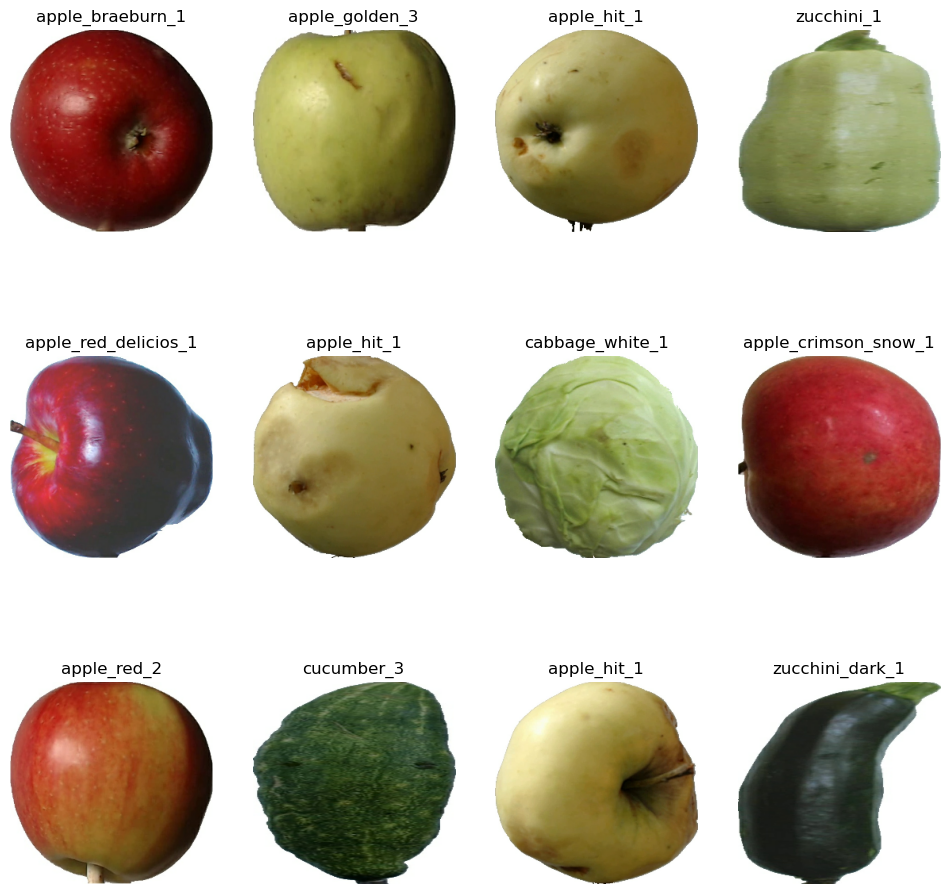

In [6]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in train_ds.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [8]:
train_ds=train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
#rescaling and reshaping
rescale_and_resize=keras.Sequential([
    keras.layers.Resizing(256,256),
    keras.layers.Rescaling(1./255)
])

In [16]:
#data augumentation
data_augumentation=keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
   
     
])

In [30]:
#model_building
#conv2D(batch_size,kernel_size,input_shape)
n_classes=24
#input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
#
model=keras.Sequential([
    rescale_and_resize,
    data_augumentation,
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(256,256,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5),  # Added dropou
    keras.layers.Dense(24, activation="softmax"),
    
    
    
])


In [32]:
model.build(input_shape=(None, 256, 256, 3))
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,256 (1.07 MB)

 Trainable params: 279,256 (1.07 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [38]:
model_history=model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    batch_size=32

)  

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 934ms/step - accuracy: 0.8881 - loss: 0.2969 - val_accuracy: 0.9149 - val_loss: 0.2745
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 934ms/step - accuracy: 0.8376 - loss: 0.4505 - val_accuracy: 0.9849 - val_loss: 0.0563
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 933ms/step - accuracy: 0.8952 - loss: 0.2816 - val_accuracy: 0.9981 - val_loss: 0.0138
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 935ms/step - accuracy: 0.8955 - loss: 0.2686 - val_accuracy: 0.9917 - val_loss: 0.0347
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 933ms/step - accuracy: 0.8759 - loss: 0.3431 - val_accuracy: 0.9997 - val_loss: 0.0139
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 933ms/step - accuracy: 0.9096 - loss: 0.2436 - val_accuracy: 0.9981 - val_loss: 0.0123
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 935ms/step - accuracy: 0.9065 - loss: 0.2608 - val_accuracy: 0.9987 - val_loss: 0.0121
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 182s 935ms/step - accuracy: 0.9262 -

In [42]:
   loss,accuracy=model.evaluate(test_ds)

98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.9984 - loss: 0.0086


In [44]:
loss,accuracy

(0.008940664120018482, 0.9983922839164734)

In [45]:
model.save("fruit_detection.keras")

In [48]:
model_history.history

{'accuracy': [0.8810784816741943,
  0.8558818697929382,
  0.9006580114364624,
  0.8988926410675049,
  0.8899053335189819,
  0.9090033769607544,
  0.9126945734024048,
  0.9194350838661194,
  0.9179906845092773,
  0.932434618473053],
 'loss': [0.31955084204673767,
  0.3818402886390686,
  0.2580876350402832,
  0.2657942771911621,
  0.296563982963562,
  0.2507489025592804,
  0.24702253937721252,
  0.22641997039318085,
  0.2290334403514862,
  0.1941879540681839],
 'val_accuracy': [0.9149004220962524,
  0.9849068522453308,
  0.9980732202529907,
  0.9916505813598633,
  0.9996788501739502,
  0.9980732202529907,
  0.9987154603004456,
  0.9759151935577393,
  0.9884393215179443,
  0.9983943700790405],
 'val_loss': [0.2745284140110016,
  0.05632632598280907,
  0.013810999691486359,
  0.03467938303947449,
  0.013903637416660786,
  0.012291963212192059,
  0.012087341398000717,
  0.049481961876153946,
  0.030864818021655083,
  0.009014466777443886]}

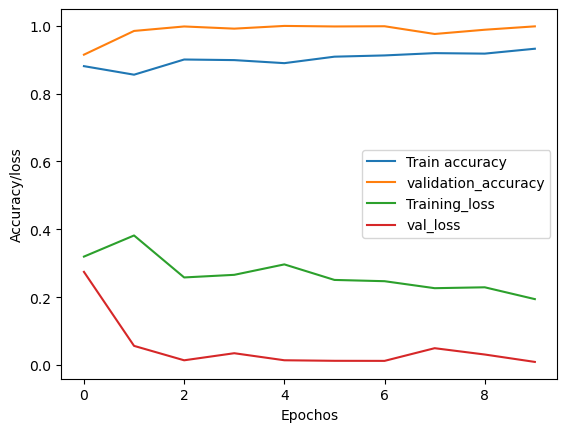

In [54]:
plt.plot(model_history.history["accuracy"], label="Train accuracy")
plt.plot(model_history.history["val_accuracy"], label="validation_accuracy")
plt.plot(model_history.history["loss"],label="Training_loss")
plt.plot(model_history.history["val_loss"], label="val_loss")
plt.xlabel("Epochos")
plt.ylabel("Accuracy/loss")
plt.legend()
plt.show()

In [55]:
model.save("fruit_prediction1.keras")

In [63]:
import numpy as np

first image to predict
actual label :  apple_6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted label :  apple_6


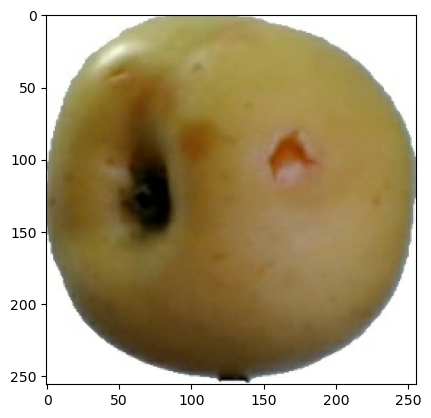

In [65]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label : ",class_names[first_label])

    
    batch_prediction = model.predict(images_batch)
    print("Predicted label : ", class_names[np.argmax(batch_prediction[0])])

In [67]:
from keras.preprocessing.image import load_img, img_to_array

In [77]:
img_path="r0_2.jpg"
image=load_img(img_path, target_size=(256,256))
image_array=img_to_array(image)
image_array=image_array/255.0
image_array=np.expand_dims(image_array,axis=0)

In [78]:
predection=model.predict(image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [80]:
predection

array([[2.4514804e-18, 2.8484156e-17, 8.2772458e-06, 6.4397461e-34,
        1.0898974e-27, 3.9120456e-27, 1.2209383e-21, 2.6767694e-31,
        3.9588990e-20, 2.9103244e-13, 3.6276223e-23, 1.2777647e-16,
        9.8424602e-09, 2.7684415e-28, 9.9998033e-01, 3.2424216e-19,
        3.9782532e-24, 1.2416716e-19, 1.6413089e-23, 1.1463666e-05,
        2.5990468e-33, 1.9372907e-19, 2.7759063e-21, 2.4394411e-15]],
      dtype=float32)

In [89]:
predicted_image=class_names[np.argmax(predection)]

In [90]:
predicted_image

'apple_rotten_1'

In [114]:
def predict_the_image(model,image):
    image_array=img_to_array(image)
    image_array=np.expand_dims(image_array,0)
    
    prediction_1=model.predict(image_array)
    predicted_class=class_names[np.argmax(prediction_1[0])]
    confidence=round(100*np.max(prediction_1[0]),2)
    
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


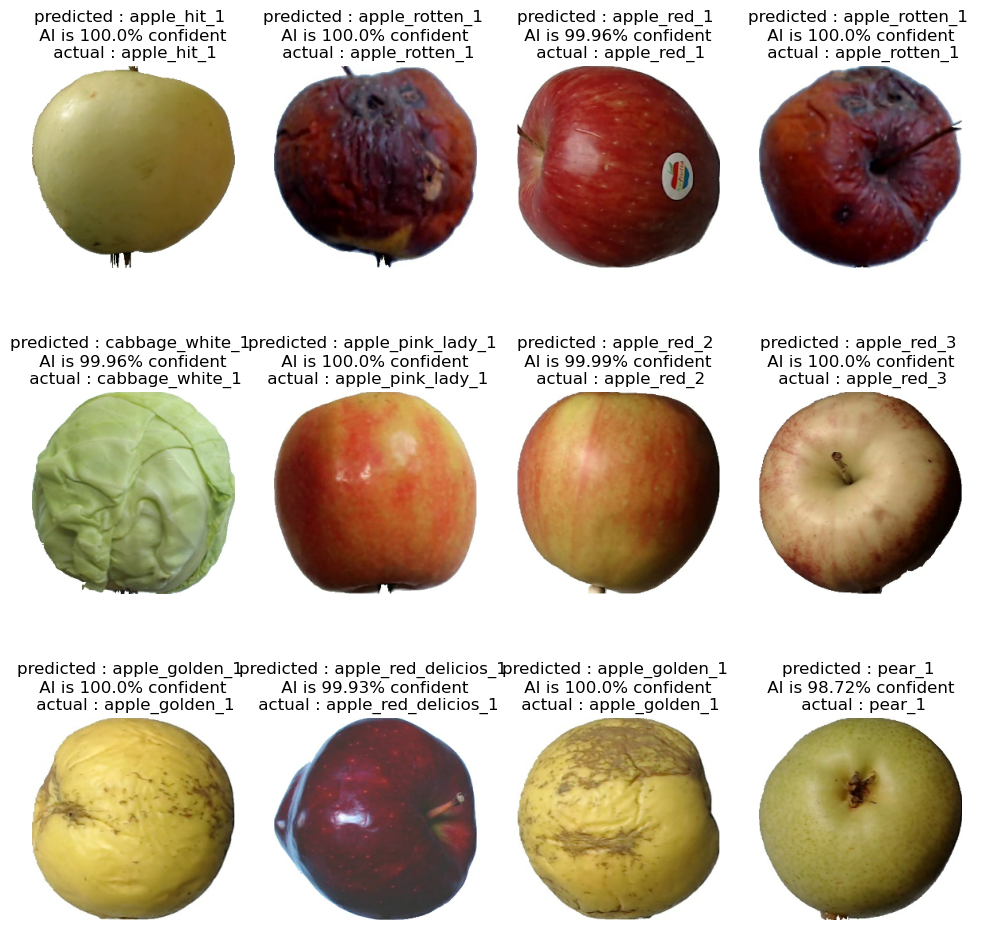

In [123]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in test_ds.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        predicted_class,confidence=predict_the_image(model,image_batch[i].numpy())
        actual_class=class_names[label_batch[i]]
        
        plt.title(f"predicted : {predicted_class} \n AI is {confidence}% confident \n actual : {actual_class}")
        
        
        plt.axis("off")
    

In [124]:
model.save("fruit_classification.keras")

In [125]:
model.save("fruit.h5")

TypeError: cannot pickle 'module' object